In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [87]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
features_df = pd.read_csv('/content/drive/MyDrive/features.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/stores.csv')

In [88]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [90]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [91]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [92]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [93]:
test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [94]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [95]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [96]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [97]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [98]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [99]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [100]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [101]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [102]:
dataset_m = features_df.merge(stores_df, how = 'inner',on = 'Store')
dataset_m.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [103]:
dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [104]:
from datetime import datetime
dataset_m['Date'] = pd.to_datetime(dataset_m['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
dataset_m['week'] = dataset_m.Date.dt.isocalendar().week
dataset_m['year'] = dataset_m.Date.dt.isocalendar().year

In [105]:
dataset_m.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,year
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,26,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,27,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,28,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,29,2013
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,30,2013


In [106]:
train_df_1 = train_df.merge(dataset_m,how = 'inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop = True)
train_df_1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010


In [107]:
def scatter(train_df_1,column):
  plt.figure()
  plt.scatter(train_df[column],train_df['Weekly_Sales'])
  plt.ylabel('Weekly_Sales')
  plt.xlabel(column)

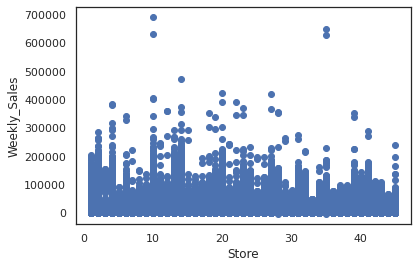

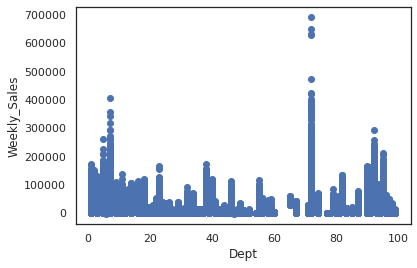

In [108]:
scatter(train_df_1,'Store')
scatter(train_df_1,'Dept')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


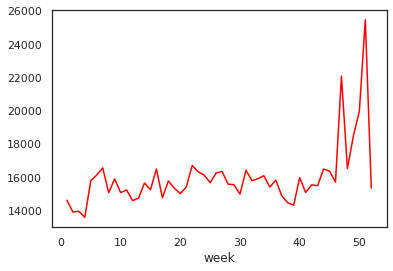

In [109]:
weekly_sales_2011 = train_df_1[train_df_1['year']== 2011]['Weekly_Sales'].groupby(train_df_1['week']).mean()
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color = 'red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


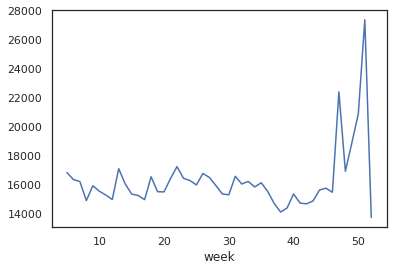

In [110]:
weekly_sales_2010 = train_df_1[train_df_1['year']==2010]['Weekly_Sales'].groupby(train_df_1['week']).mean()
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


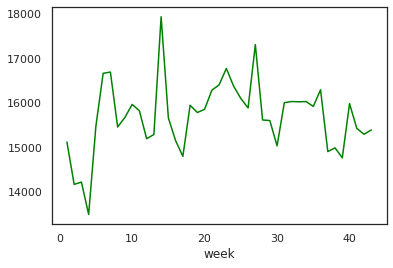

In [111]:
weekly_sales_2012 = train_df_1[train_df_1['year']==2012]['Weekly_Sales'].groupby(train_df_1['week']).mean()
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color = 'green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


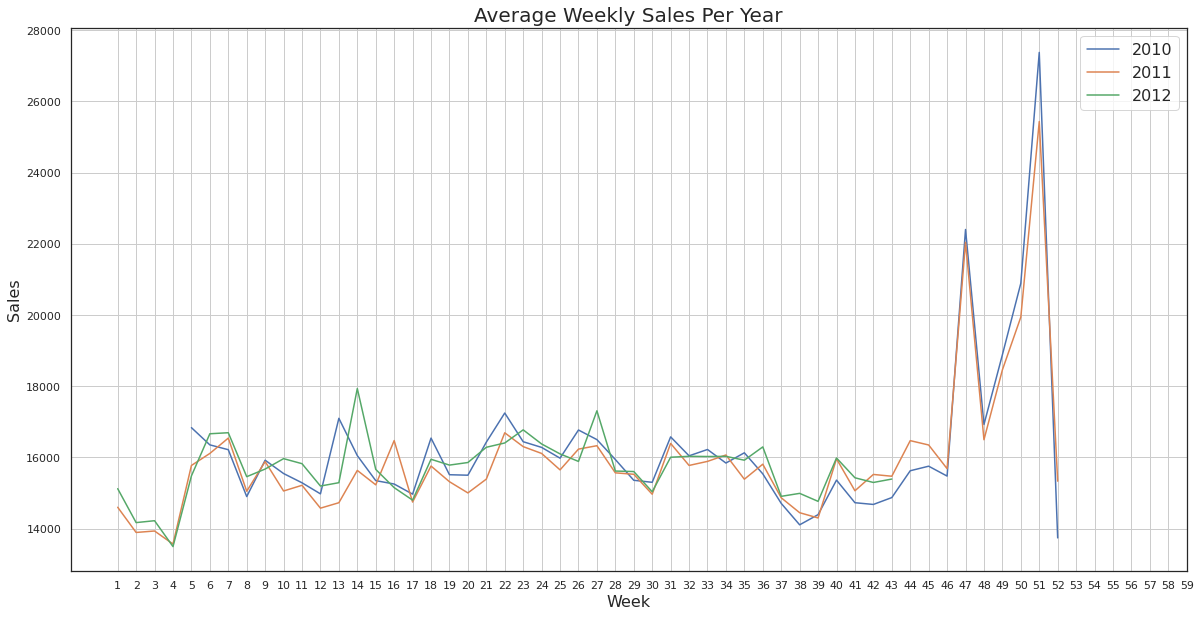

In [112]:
plt.figure(figsize= (20,10))
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60,step =1))
plt.title('Average Weekly Sales Per Year',fontsize= 20)
plt.xlabel('Week',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)
plt.legend(['2010','2011','2012'],loc = 'best',fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


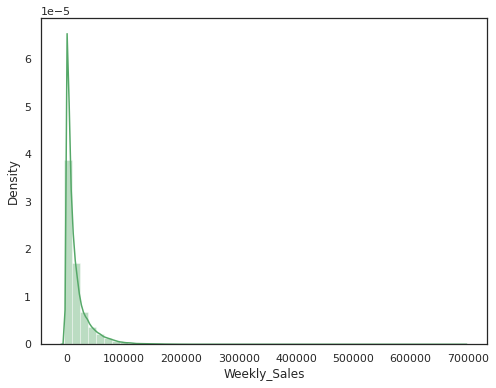

In [113]:
f,ax = plt.subplots(figsize = (8,6))
sns.distplot(train_df['Weekly_Sales'],color = 'g')

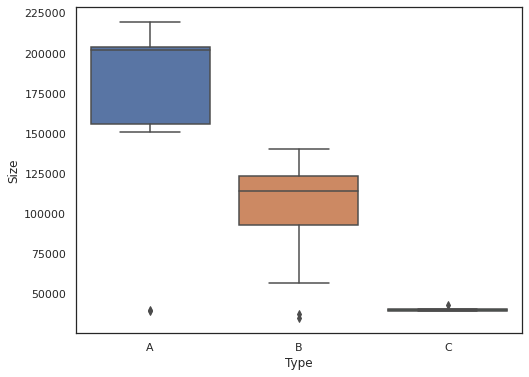

In [114]:
data = pd.concat([stores_df['Type'],stores_df['Size']],axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='Type',y='Size',data=data)

In [115]:
weekly_sales_store = train_df['Weekly_Sales'].groupby(train_df['Store']).mean()

In [116]:
weekly_sales_store.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [117]:
weekly_sales_store_df = pd.DataFrame(weekly_sales_store)


In [118]:
weekly_sales_store_df.sort_values("Weekly_Sales",ascending = False).style.bar(align='left',width=98,color='#FFD200')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


In [119]:
weekly_sales_store_df.sort_values("Weekly_Sales").style.bar(align='left',width= 98,color='#ff00bf')

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


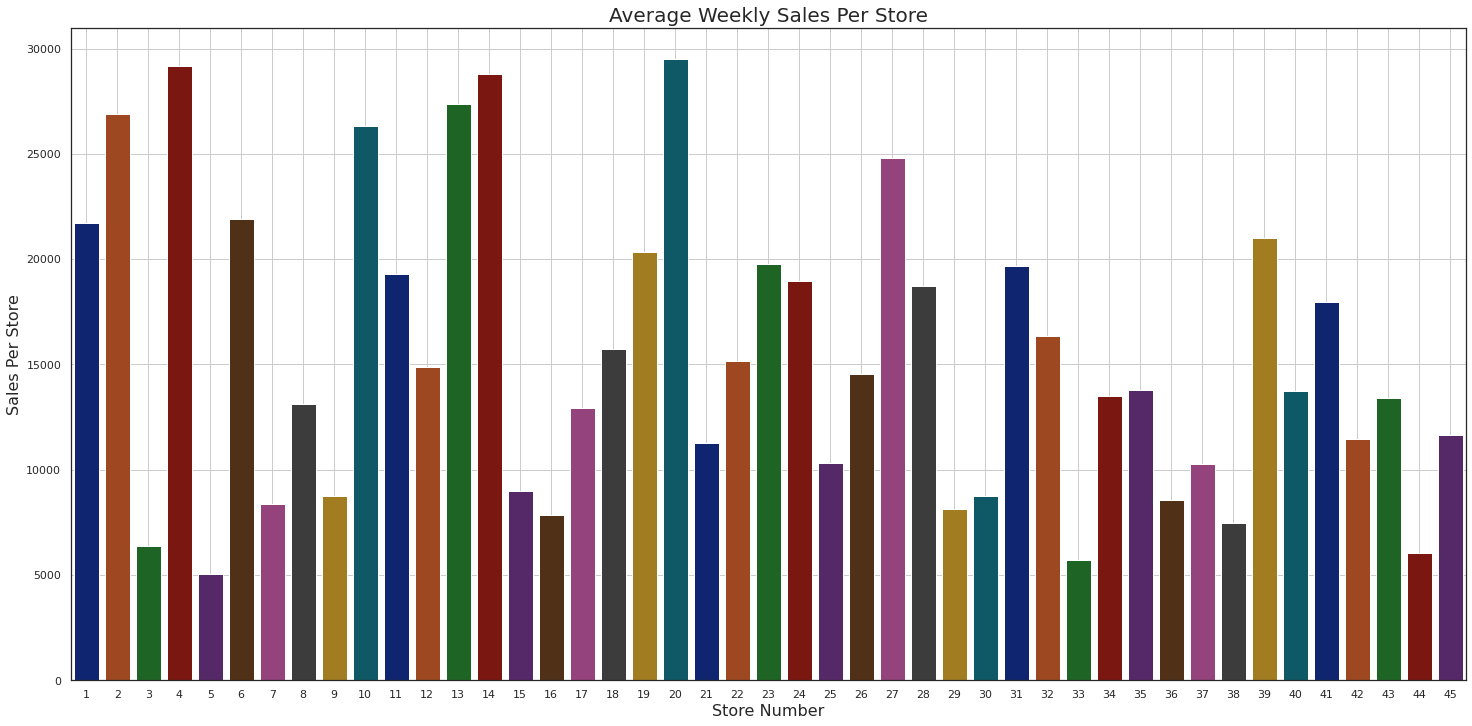

In [120]:
plt.figure(figsize = (25,12))
sns.barplot(weekly_sales_store.index,weekly_sales_store.values,palette = 'dark')
plt.grid()
plt.title("Average Weekly Sales Per Store",fontsize = 20)
plt.xlabel('Store Number',fontsize=16)
plt.ylabel('Sales Per Store',fontsize =16)
plt.show()

In [121]:
weekly_sales_Dept = train_df['Weekly_Sales'].groupby(train_df['Dept']).mean()


In [122]:
weekly_sales_Dept_df = pd.DataFrame(weekly_sales_Dept)

In [123]:
weekly_sales_Dept_df

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


In [124]:
weekly_sales_Dept_df.sort_values("Weekly_Sales",ascending= False).style.bar(align = 'left',width = 98,color = "#d65f5f")

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


In [125]:
weekly_sales_Dept_df.sort_values("Weekly_Sales").style.bar(align='left',width=98,color = '#bfff00')

,Weekly_Sales
Dept,
47,-7.682554
43,1.193333
78,7.296638
39,11.123750
51,21.931729
45,23.211586
54,108.305985
77,328.961800
60,347.370229


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


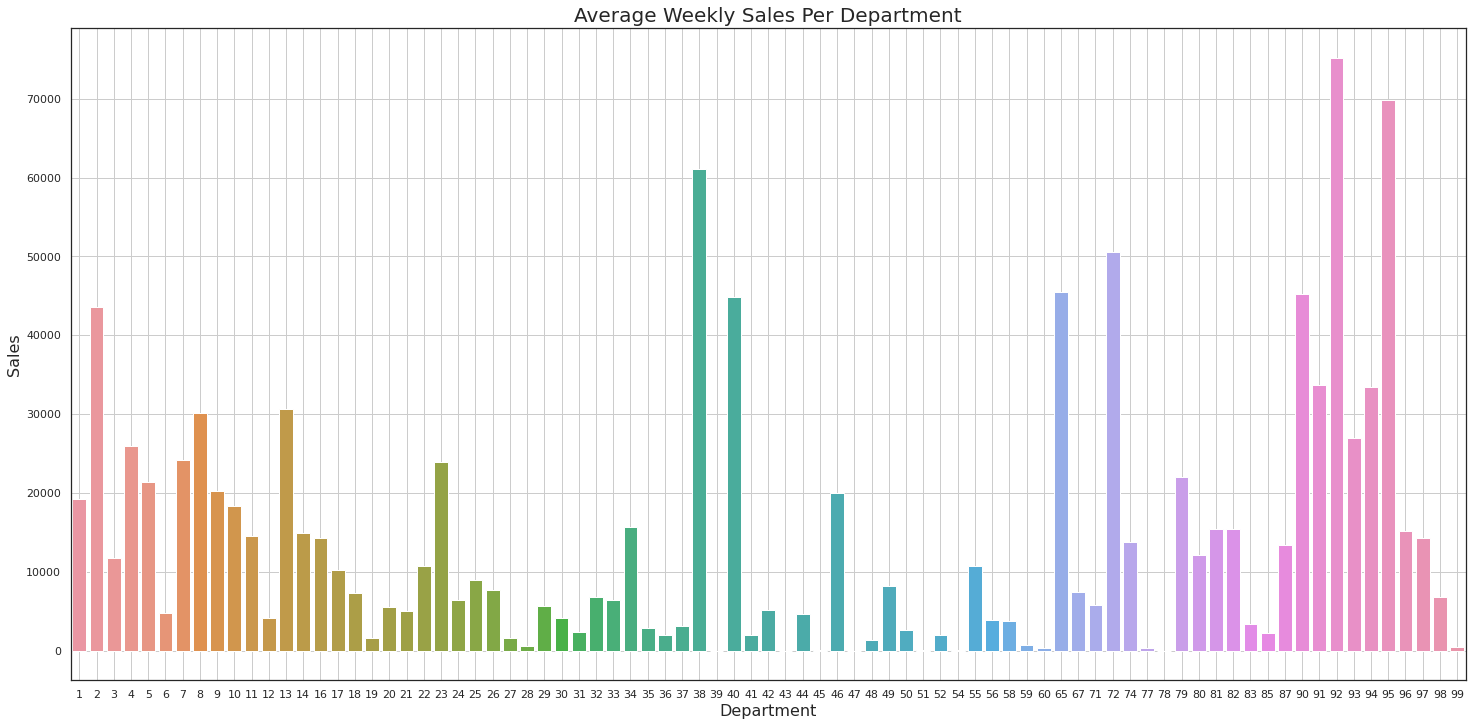

In [126]:
plt.figure(figsize=(25,12))
sns.barplot(weekly_sales_Dept.index,weekly_sales_Dept.values)
plt.grid()
plt.title('Average Weekly Sales Per Department',fontsize = 20)
plt.xlabel('Department',fontsize=16)
plt.ylabel('Sales',fontsize = 16)
plt.show()

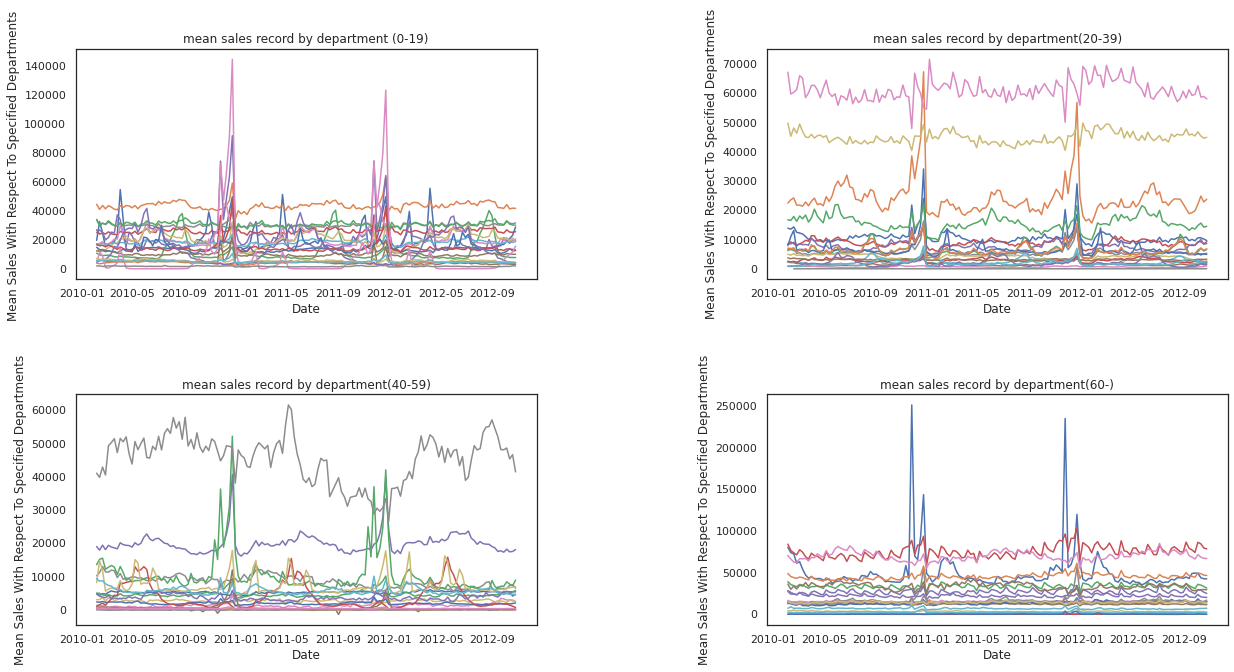

In [127]:
grouped = train_df.groupby(['Dept','Date']).mean().reset_index()
data = grouped[['Dept','Date','Weekly_Sales']]
dept=train_df['Dept'].unique()
dept.sort()
dept_1 = dept[0:20]
dept_2=dept[20:40]
dept_3=dept[40:60]
dept_4=dept[60:]
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(wspace = 0.5,hspace =0.5)
fig.subplots_adjust(left = 0.1,right = 0.9,bottom = 0.1,top = 0.9)
for i in dept_1:
  data_1=data[data['Dept']==i]
  ax[0,0].plot(data_1['Date'],data_1['Weekly_Sales'],label='Dept_1_mean_sales')
for i in dept_2:
  data_1=data[data['Dept']==i]
  ax[0,1].plot(data_1['Date'],data_1['Weekly_Sales'],label='Dept_1_mean_sales')
for i in dept_3:
  data_1=data[data['Dept']==i]
  ax[1,0].plot(data_1['Date'],data_1['Weekly_Sales'],label='Dept_1_mean_sales')
for i in dept_4:
  data_1=data[data['Dept']==i]
  ax[1,1].plot(data_1['Date'],data_1['Weekly_Sales'],label='Dept_1_mean_sales')
ax[0,0].set_title('mean sales record by department (0-19)')
ax[0,1].set_title('mean sales record by department(20-39)')
ax[1,0].set_title('mean sales record by department(40-59)')
ax[1,1].set_title('mean sales record by department(60-)')

ax[0,0].set_ylabel('Mean Sales With Respect To Specified Departments ')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean Sales With Respect To Specified Departments')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean Sales With Respect To Specified Departments')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean Sales With Respect To Specified Departments')
ax[1,1].set_xlabel('Date')



plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


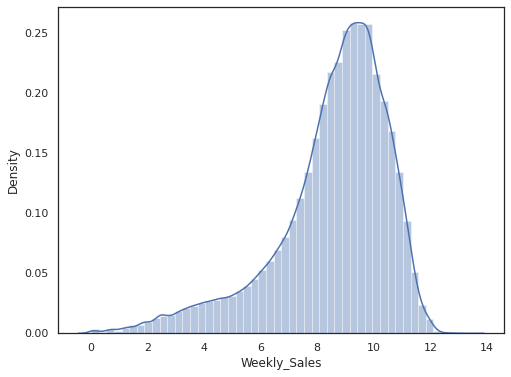

In [128]:
train_over_zero_sales=train_df[train_df['Weekly_Sales']>0]
train_below_zero_sales=train_df[train_df['Weekly_Sales']<=0]
sales_over_zero_sales=np.log1p(train_over_zero_sales['Weekly_Sales'])
f,ax=plt.subplots(figsize=(8,6))
sns.distplot(sales_over_zero_sales)

In [129]:
print("skewness=",sales_over_zero_sales.skew())
print("kurtosis=",sales_over_zero_sales.kurt())

skewness= -1.2011878481918052
kurtosis= 1.5541238937236335


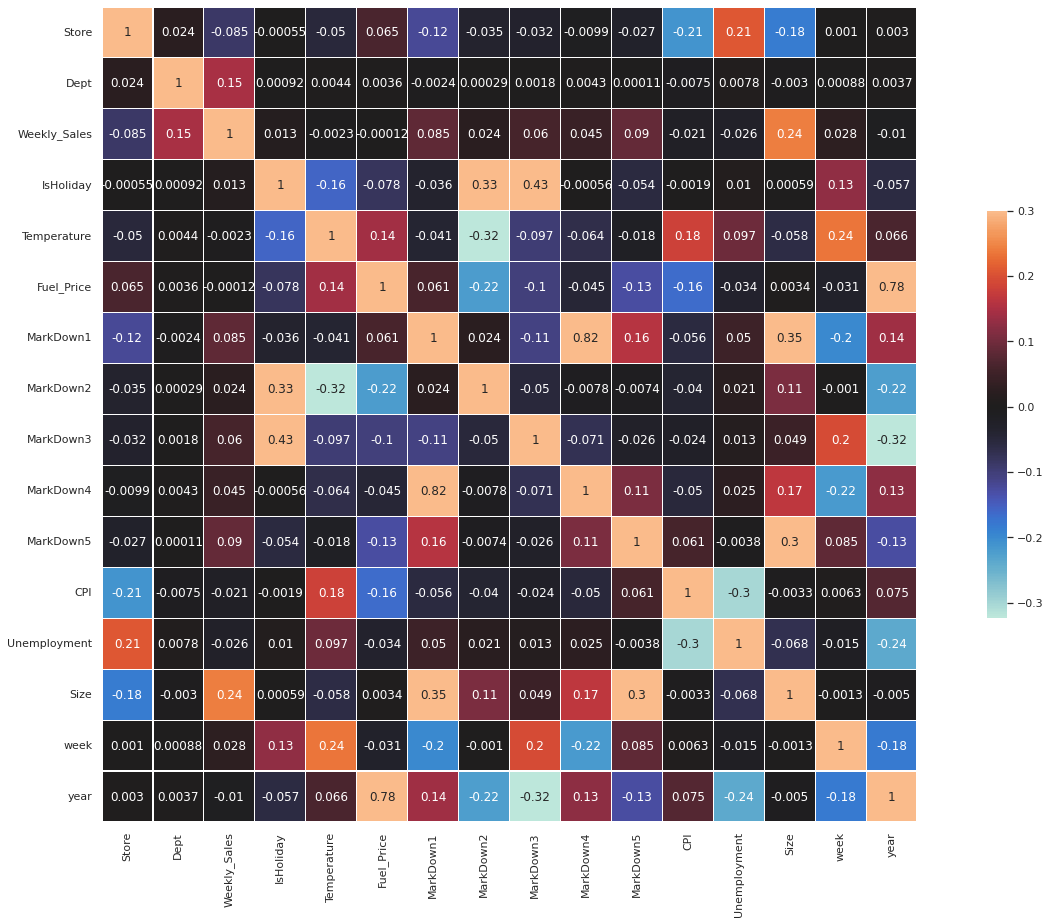

In [130]:
sns.set(style = 'white')
fig,ax=plt.subplots(figsize=(25,15))
sns.heatmap(train_df_1.corr(),cmap ='icefire',vmax = 0.3,center=0,square=True,linewidth=0.5,cbar_kws={'shrink':0.5},annot = True)